#Decision Tree Model - Final Project

##Introduction
I would use the data analysis processes and techniques in this project. I would start by briefly answering the following questons:

### What are the processes of the Data Analysis?
The Data Analysis is a process of collecting, transforming, cleaning, and modelling the data for the required information.

### List 5 of the main challenges for Data Analysis?
1.	Finding what you want or defining the question.
2.	Collecting the data.
3.	Cleaning and transforming the data.
4.	Analysing the data.
5.	Interpreting the results.

### Coding a simple decision tree
---

In this final project of this course, I am going to work with a dataset, using the idea of a decision tree class.  I am going to simplify the model and use Python code to make a simple decision tree classification model.  I will do this for two reasons:
*   writing the code is often good for helping to understand what is going on under the bonnet of a library function
*   it is a good coding exercise for practice as it mostly depends on calculations and if..elif..else statements

In this project, I am going to code a decision tree which will use the calculated probabilities to make decisions about whether a row of given data would be classified as Iris-virginica, or not, based on sepal and petal dimensions.  It is easier to classify between two values (Iris-virginica or not).  Later, using this information, species would be further predicted by probabilities of error.

![Iris-petals and sepals](https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg)



## The workflow:

*   Collecting and investigating the data
*   Cleaning the data
*  divide the data set into 70% of the rows for training and 30% for testing  (we can increase the size of the training set later)
*  find the mean for each of the 4 size columns
*  calculate the proportion of each column that are on or above mean that are of a species (ie proportion of petal-lengths on or above mean that are Iris-virginica)
*  infer the proportion of each that are not of that species (using 1 - proportion above).  In both cases we are looking to find if either of these is 1, which could be infered as definitely not that species. 
*  calculate a Gini Index that will indicate the probability that a prediction will be incorrect
*  use the results of the Gini Index to model a decision tree
*  code the decision tree model into a function that will return whether or not a row in the test set is predicted to be of species Iris-virginica
*  use the decision tree function to predict, for each row in the test set, if the species will be Iris-virginicia or not, using a set of nested if statements to classify
*  compare the predicted values against the actual values in the test set - what proportion were predicted correctly?

### Investigating the iris data set
---
Let's start by looking at the data.  We are going to use a data set that contains data on iris flowers.

First, need to load the data at this location: https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv into a dataframe called iris_data

Since, the columns in the CSV file do not have headings, when reading the file, need to add column headings like this:
```
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris_data = pd.read_csv(url, name=names)
```


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
column_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']

# Columns for the encoding
dimension_columns = column_names[:-1]

def load_data_frame(url, columns):
  df = pd.read_csv(url, names=column_names)
  return df

iris_data = load_data_frame(url, column_names)

###Information and Statistics:
The loaded data information shows, if the data has successfully been loaded into the DataFrame, and if it needs any data cleaning and wrangling. The statistical information was aquired and the 5 point summary statistics information decribing the maximum, minimum, upper-quartile and lower-quartile values were checked. Additionaly the median was obtained and was included to the information generated through the builtin Pandas DataFrame.describe() function.

In [2]:
# The funcion displays information of the raw data-set and the calculated median
def show_info(df):
  # Task 1 - Show Column info (how many columns, what type of data, any missing data?)
  display(df.info())
  print('')

  # Task 2 - The first 10 and the last 10 records to show the type of values included
  display(df.head(10))
  print('')
  display(df.tail(10))
  print('')

  #Task 3 - Find out how many unique values there are in the species column
  unique_val_species = df['species'].unique()
  print(f'Unique Species = {len(unique_val_species)}, {unique_val_species}')
  print('')

  #Task 4 - Calculate and show stats
  describe_df = df.describe()

  median_dict = dict(df[['sepal-length', 'sepal-width', 'petal-length'\
                                    , 'petal-width']].median(), index=['median'])
  stats_df = pd.DataFrame.from_records(median_dict, index=['median'])
  stats_df.drop(columns=['index'], inplace=True)
  stats_df = pd.concat([describe_df, stats_df])
  return stats_df

show_info(iris_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


,sepal-length,sepal-width,petal-length,petal-width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica



Unique Species = 3, ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']



,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
median,5.800000,3.000000,4.350000,1.300000


*  Take a look at the column info (how many columns, what type of data, any missing data?)
*  Take a look at the data values in the first 10 and the last 10 records to get an idea of the type of values included
*  Find out how many unique values there are in the species column
*  Find out the maximum, minimum, mean, median and upper and lower quartile values in each of the columns

It shows that the data has successfully been loaded into the DataFrame and that there are no null or missing values in any of its columns.


### Drop The Nulls
Just to make sure we don't have any null values loaded I would run the below instruction to drop any null values, if any exists, from each column.

In [3]:
# Drop any null values from each column
iris_data.dropna(inplace=True)

###Checking For The Extreme Outliers
An outlier is an abnormal value in the data that is either extremely high or low compared to the rest of the data. Outliers can skew results. 

A value is considered to be an outlier if it is any of:
*  greater than `Q3 + 1.5 * interquartile_range`
*  less than `Q1 - 1.5 * interquartile_range`
*  more than 2 standard deviations from the mean

Q3 = value at 75% of data, Q1 = value at 25% of the data, IQR is the interquartile range, the difference between Q3 and Q1.  

We can check for outliers using a Box plot, in which:

*  the upper line on the boxplots arm (whisker) is `Q3 + 1.5 * IQR`
*  the lower line on the boxplots arm (whisker) is `Q1 - 1.5 * IQR`
*  the middle line of the box is the median
*  the top of the box is Q3
*  the bottom of the box is Q1
*  outliers are shown as circles or dots, either above or below the whiskers

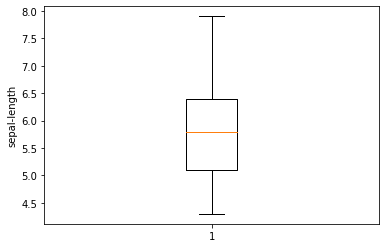

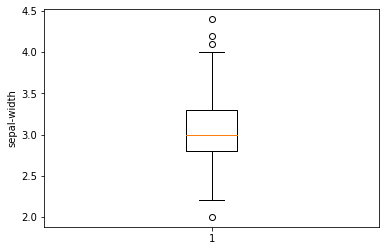

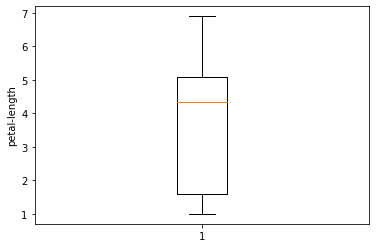

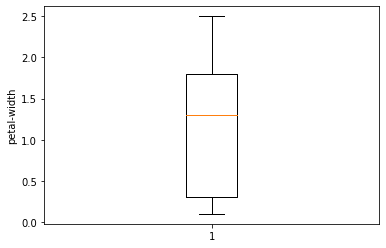

In [4]:
# Draw the plot
def show_boxplot(df, columns):
  import matplotlib.pyplot as plt  
  # Draw the Boxplot
  for column in columns:
    plt.boxplot(x=df[column])
    # plt.xlabel(xlabel)
    plt.ylabel(column)
    plt.show()
	
# Show the boxplot of the original dataset
show_boxplot(iris_data, dimension_columns)

From the above Box and Whiskers plots it has become now apparent that the dataset does have some outliers present in it (defined as the data-point 1.5 times the length of the box above or below it). 
In the 'sepal-width' variable there are both high and low outliers, and that there are not any extreme outliers (defined as the data-point 3 times the length of the box above or below it) in any of the variables. 
Since apparently there are no extreme outliers present in the dataset and since there are some outliers I would, firstly from my research point of view and secondly by giving the outliers benifit of doubt, run my research and data analysis on the data-set without having removed the outliers first and after having removed the outliers from the data-set. 
Lastly, I would compare both of the result-sets to see if there was any significant improvement and should then be able to make reliable and evidence based conclusions.

sepal-length
------------------------------------------------------------
Upper Limit:           8.350000000000001
Lower Limit:           3.1499999999999986
IQR:                   1.3000000000000007
0 outliers found and eliminated from the 'sepal-length' column

------------------------------------------------------------
sepal-width
------------------------------------------------------------
Upper Limit:           4.05
Lower Limit:           2.05
IQR:                   0.5
4 outliers found and eliminated from the 'sepal-width' column

------------------------------------------------------------
sepal-width
------------------------------------------------------------
Upper Limit:           4.05
Lower Limit:           2.05
IQR:                   0.5
0 outliers found and eliminated from the 'sepal-width' column

------------------------------------------------------------
petal-length
------------------------------------------------------------
Upper Limit:           10.349999999999998


None

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



Outliers removed dataset:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  146 non-null    float64
 1   sepal-width   146 non-null    float64
 2   petal-length  146 non-null    float64
 3   petal-width   146 non-null    float64
 4   species       146 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


None

,sepal-length,sepal-width,petal-length,petal-width
count,146.000000,146.000000,146.000000,146.000000
mean,5.856849,3.036986,3.807534,1.219863
std,0.834093,0.395145,1.757117,0.760365
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


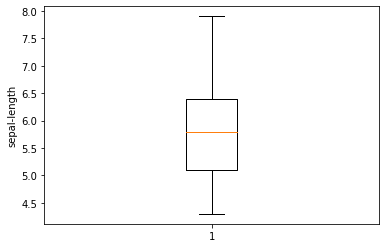

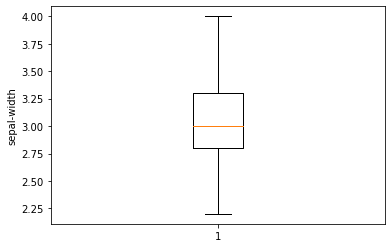

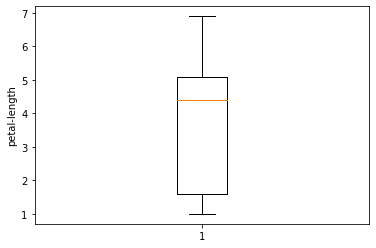

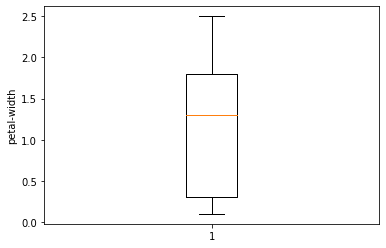

In [5]:
# The function calculates Q1, Q3, IQR and filters out any data-point below or above the limits
def remove_outliers(df, column):
  # Get the quantiles Q1 and Q3
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  # Calculate the interquartile range IQR = (Q3 - Q1)
  IQR = Q3 - Q1

  # Calculate the lower and upper limits 
  upper_limit = Q3 + 1.5 * IQR
  lower_limit = Q1 - 1.5 * IQR

  print(f'{column}')
  print('-'*60)
  print(f'Upper Limit:           {upper_limit}')
  print(f'Lower Limit:           {lower_limit}')
  print(f'IQR:                   {IQR}')

  # Filter all the rows for the column below the lower_limit
  df_t = df[df[column] >= lower_limit]
  # Filter all the rows for the column above the upper_limit
  df_normal = df_t[df_t[column] <= upper_limit]
  return df_normal

# The function shows the clean up progress and stats
def show_cleanup_stats(df, column):
  # Remove any Outliers from the column
  df_rec_nums = len(df)
  df_normal = remove_outliers(df, column)
  normal_df_rec_nums = len(df_normal)
  num_outliers = df_rec_nums - normal_df_rec_nums
  print(f"{num_outliers} outliers found and eliminated from the '{column}' column\n")
  print('-'*60)
  return df_normal, num_outliers

# Recursively check the column for any outliers
# h1 = assume there is an outlier, h0 = there is, probably, no outlier.
def get_recurs_clean(df, column, h1=1):
  if h1 <= 0:
    return df
  df_normal, h0 = show_cleanup_stats(df, column)
  return get_recurs_clean(df=df_normal, column=column, h1=h0) 

# Further clean the DataFrame through pass filtering
def get_pass_filtering(df, columns):
  # Through the first pass filtering
  for column in columns:
    df = get_recurs_clean(df, column)
  # Through the second pass filtering
  i = 0
  while i <=1:
    for column in columns:
      df = get_recurs_clean(df, column)
      i+=1
  return df

# Get a cleaned DataFrame from any outlier
df_normal_iris_data = get_pass_filtering(iris_data, dimension_columns)
print('\nOriginal dataset:\n')
display(iris_data.info())
display(iris_data.describe())
print('\nOutliers removed dataset:\n')
display(df_normal_iris_data.info())
display(df_normal_iris_data.describe())

# Show the boxplot of the cleaned data-set
show_boxplot(df_normal_iris_data, dimension_columns)

Now I have cleaned the original data-set and have stored it in a new DataFrame above for later use when it comes to the comparisons. Please note: there is not very significant difference between the means, medians, minimum, maximum and standard deviation values of the two datasets.

###Visual Inspection Of The Data
The next step is to investigate our data-set further by way of plotting the data columns to see if there exists any correlation between any set of variables.

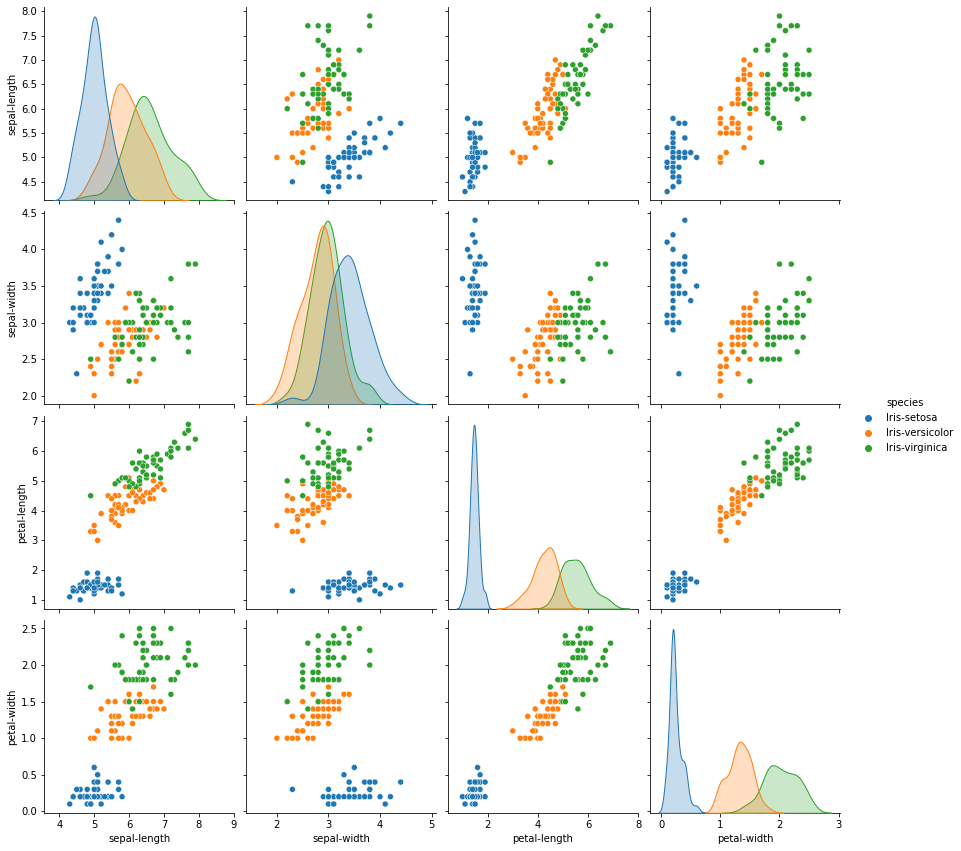

In [6]:
# The function plots the data in pair of the data-set columns
def show_pairplot(df, pair):
  sns.pairplot(df, hue=pair, height = 3, diag_kind = "kde")
  plt.show()

show_pairplot(iris_data, 'species')

###Comparison
From the above pairplot it could be asserted that the 'Iris-setosa' species differs from rest of the two Iris flower species on 'petal-width' against 'sepal-width', and 'petal-length' against 'sepal-width' paired variable plots.

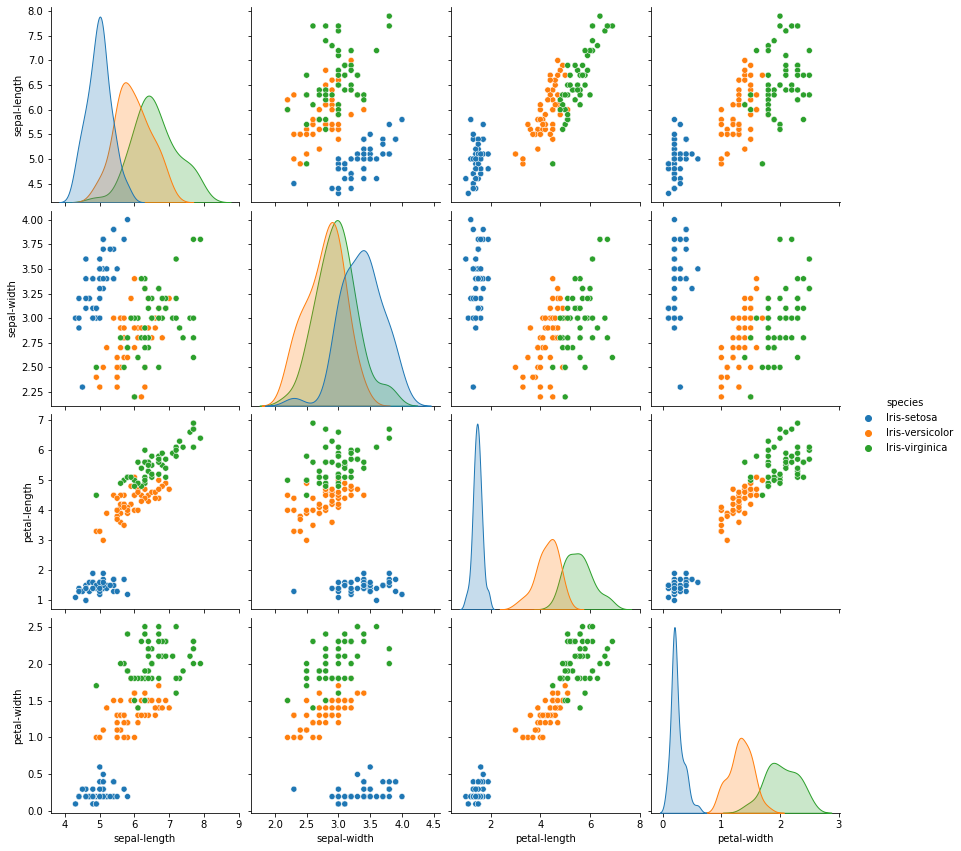

In [7]:
# Show the Pairplot for the cleaned dataset
show_pairplot(df_normal_iris_data, 'species')

###Dataset with or without the outliers - Comparison
It apears from both of the pairplots above that there is no significant difference between the two datasets.

##Regression
I am going to do further analysis on regression and find the correlation coefficients for the variables, and to see if there 'is' any significant difference.

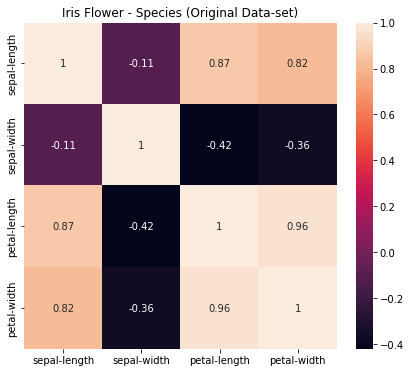

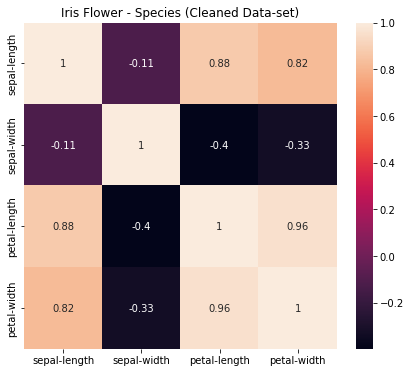

In [8]:
# The function shows the correlation figures in a heatmap
def show_heatmap(df, title):
  corr = df.corr()
  fig, ax = plt.subplots(figsize = (7,6))
  sns.heatmap(corr, annot=True, ax = ax)
  plt.title(title)
  plt.show()

show_heatmap(iris_data, 'Iris Flower - Species (Original Data-set)')
show_heatmap(df_normal_iris_data, 'Iris Flower - Species (Cleaned Data-set)')  

### Comparison
As can be seen from the heatmap above that there is a very strong correlation between:  

*   'petal-length' and 'petal-width' (with a correlation figure of 0.96)
*   'petal-length' and 'sepal-length' (with a correlation figure of 0.87)
*   'petal-width' and 'sepal-length' (with a correlation figure of 0.82)

Note: it apears from both of the above heatmaps that there is no significant difference between the two datasets, therefore, I shall not investigate the outliers any further and it probably makes sense to include them as part of the researched data-points unless I have to get rid of them later down the analysis.





## Regression and Best Fit Line
Now that I have found that there are variables with strong correlations, I would further explore the dataset and get the 'Best Fit' regression lines, r^2 and p-values.

In [9]:
def get_regression(x, y):
  from scipy.stats import linregress
  # Calculate regression for the variables
  regression = linregress(x,y)
  # Get slope value
  slope = regression.slope
  # Get intercept value
  intercept = regression.intercept
  # Get r value
  r_value = regression.rvalue
  # Get p value
  p_value = regression.pvalue
  # Return and display the values
  return regression, slope, intercept, r_value, p_value

def show_regression(x, y):
  # Show regression
  regression, slope, intercept, r_value, p_value =  get_regression(x, y)
  display(regression)
  print('')
  print(f'slope:        {round(slope, 2)}')
  print(f'intercept:    {round(intercept, 2)}')
  print(f'r value:      {round(r_value, 2)}')
  r_sqr = r_value * r_value
  print(f'r^2 value:    {round(r_sqr, 2)}')
  print(f'p value:      {p_value}')

# Create x, y variables
pl = iris_data['petal-length']
pw = iris_data['petal-width']
show_regression(pl, pw)

LinregressResult(slope=0.41641913228540123, intercept=-0.3665140452167277, rvalue=0.9627570970509666, pvalue=5.776660988491603e-86, stderr=0.009612539319328553)


slope:        0.42
intercept:    -0.37
r value:      0.96
r^2 value:    0.93
p value:      5.776660988491603e-86


In [10]:
# Create x, y variables
pl = iris_data['petal-length']
sl = iris_data['sepal-length']
show_regression(pl, sl)

LinregressResult(slope=0.4091258984678836, intercept=4.305565456292049, rvalue=0.8717541573048717, pvalue=1.0384540627938665e-47, stderr=0.018900710852199916)


slope:        0.41
intercept:    4.31
r value:      0.87
r^2 value:    0.76
p value:      1.0384540627938665e-47


In [11]:
# Create x, y variables
pw = iris_data['petal-width']
sl = iris_data['sepal-length']
show_regression(pw, sl)

LinregressResult(slope=0.8875190520674566, intercept=4.779493829588476, rvalue=0.8179536333691636, pvalue=2.3148491512727406e-37, stderr=0.051309826962687884)


slope:        0.89
intercept:    4.78
r value:      0.82
r^2 value:    0.67
p value:      2.3148491512727406e-37


### Results & Comparisons
Since the p-value is less than 0.05 value, it shows that it is a statistically significant result (means that the probability that the hypothesis is true, is very high). That is, the Independent Variable (IV) is more than 95% likely be affecting the Dependend Variable (DV) and that the affect was not random. A R^2 of > 0.50 means that the data explains more than 50% of the change in data-points and rest of the change could be due to other variables. Having the above R^2 values all > 0.5, essentially, it means that our model fits well with the data.

###Draw the Best Fit Line Plots

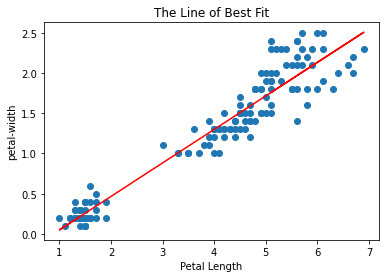

In [12]:
# Draw the plot
def show_corr_scatterplot(x, y, slope, intercept, xlabel=None, ylabel=None):
  import matplotlib.pyplot as plt  
  # Draw the scatter graph
  plt.scatter(x,y)
  plt.title('The Line of Best Fit')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  # Draw the regression line and show the graph
  y = slope*x + intercept
  plt.plot(x, y, color='red')
  plt.show()

# Get regression values
regr_values, slope, intercept, r_value, p_value = get_regression(pl,pw)

# Display
show_corr_scatterplot(pl, pw, slope, intercept, 'Petal Length', pw.name)

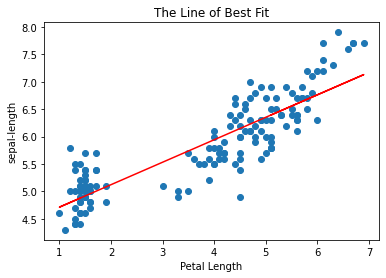

In [13]:
# Get regression values
regr_values, slope, intercept, r_value, p_value = get_regression(pl,sl)

# Display
show_corr_scatterplot(pl, sl, slope, intercept, 'Petal Length', sl.name)

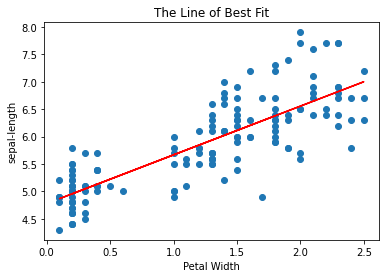

In [14]:
# Get regression values
regr_values, slope, intercept, r_value, p_value = get_regression(pw,sl)

# Display
show_corr_scatterplot(pw, sl, slope, intercept, 'Petal Width', sl.name)

###Comparison
The 'Line of Best Fit' plots above show that the under test variables are strongly correlated and that most of the data-points either lie on the line or closely clutter arround (above or below) the best fit line.

### Split the data into train and test sets
---

Now I am going to split the data set into and 70% train, 30% test, split.  From now, I shall just use the train data set.


In [15]:
# import the train_test_split function
from sklearn.model_selection import train_test_split
train, test = train_test_split(iris_data, test_size=0.33)

### Menu
Additionaly, I have provided a user interface 'Menu' below for making it easy to select any of the measures for the indicators.

In [16]:
# The function displays a menu to make a selection for the indicator
def show_menu():
  option_dict = {0:'Mean', 1:'Median', 2:'Upper-Quartile', 3: 'Lower-Quartile'}
  print('Menu Options:')
  for k, v in option_dict.items():
    if k==0:
      print(f"{k} = {v} (default)")
    else:
      print(f"{k} = {v}")
  selected_option = input(f"\nPlease input an option? ")
  if selected_option.isdigit():
    selected_option = int(selected_option)
  else:
    selected_option = 0
  if selected_option not in [0, 1, 2, 3]:
    selected_option = 0
  # Create a tuple of the opted selection
  selected_indicator = (selected_option, option_dict[selected_option])
  print(f"\nThe indicator measure selected: {selected_indicator}\n")
  return selected_indicator

selected_indicator = show_menu()

Menu Options:
0 = Mean (default)
1 = Median
2 = Upper-Quartile
3 = Lower-Quartile

Please input an option? 1

The indicator measure selected: (1, 'Median')



### Assumptions and classification
---

Let's make some assumptions based on the data

1.  Iris-setosa, Iris-versicolor, Iris-virginica are the full range of types of iris to be analysed
2.  Although this is a small data set, the means are fairly representative

With these in mind, let's start by classifying sepal/petal size into long/short and wide/narrow with values on or above the mean taken as long or wide and those below as short or narrow.

This is a starting point.  I will first try to find a value (indicator) for each column where rows on or above do not contain any of a particular species, this might indicate that this column is a good (if not rough) indicator of species.  For now, the (default) indicator is the mean, I shall:

Calculate, and store the means of the four columns

*  **Test**:
Display train.describe() to see the value of the means of the training set. Print the four means and compare to the output of train.describe() to check that they have been calculated correctly.

*  Create a new dataframe with the numeric columns encoded so show a 1 for any value that is above the mean for its column and 0 for any that isn't.




In [17]:
# Calculate the indicator as per the option selected
def show_stats_df(df, columns, indicator):
  selected_option, indicator_txt = indicator
  describe_df = df.describe()
  indicator_dict = {}
  if selected_option == 0:         # mean  
    for column in columns:
       indicator_dict[column] = df[column].mean()
  elif selected_option == 1:       # median
    for column in columns:
       indicator_dict[column] = df[column].median()
  elif selected_option == 2:       # upper-quartile
    for column in columns:
       indicator_dict[column] = df[column].quantile(0.75)
  elif selected_option == 3:       # lower-quartile
    for column in columns:
       indicator_dict[column] = df[column].quantile(0.25)
  stats_df = pd.DataFrame.from_records(indicator_dict, index=[indicator_txt.lower()])
  stats_df = pd.concat([describe_df, stats_df])
  return indicator_dict, stats_df

# Show the summary statistics including the calculated values
print('The summary statistics including the calculated Indicator:\n')
indicator_dict, stats_df = show_stats_df(train, dimension_columns, selected_indicator)
display(stats_df)

The summary statistics including the calculated Indicator:



,sepal-length,sepal-width,petal-length,petal-width
count,100.000000,100.000000,100.000000,100.000000
mean,5.883000,3.009000,3.984000,1.301000
std,0.829878,0.380349,1.706063,0.762438
min,4.300000,2.200000,1.100000,0.100000
25%,5.175000,2.800000,1.700000,0.400000
50%,5.900000,3.000000,4.500000,1.400000
75%,6.400000,3.225000,5.300000,1.900000
max,7.900000,3.900000,6.900000,2.500000
median,5.900000,3.000000,4.500000,1.400000


In [18]:
# get the mean for each column and apply a function to encode
# into 1 (above mean) and 0 (mean or below mean)
# 'encode' function requires a dataframe, column name & the encoding 'indicator'
def encode(df, **kwds):
  key = kwds['key']
  indicator = kwds['indicator']
  if df[key] >= indicator:
    return 1
  else:
    return 0
  return

# run the function for each column so that each of the four columns are encoded,
# then drop the original columns, saving as a new dataframe
def get_encoded_df(df, columns, indicator):
  selected_option, indicator_txt = indicator
  if selected_option == 0:             # 'mean'
    for column in columns:
      df[column] = \
      df.apply(encode, axis=1, key=column, indicator=df[column].mean())
  elif selected_option == 1:           # 'median'
    for column in columns:
      df[column] = \
      df.apply(encode, axis=1, key=column, indicator=df[column].median())
  elif selected_option == 2:           # 'upper-quartile'
    for column in columns:
      df[column] = \
      df.apply(encode, axis=1, key=column, indicator=df[column].quantile(0.75))
  elif selected_option == 3:           # 'lower-quartile':
    for column in columns:
      df[column] = \
      df.apply(encode, axis=1, key=column, indicator=df[column].quantile(0.25))
  else:
      print('Sorry, yet to programme it :) ')  
  return df

# Encode the DataFrame with respect to the selected indicator
train = get_encoded_df(train, dimension_columns, selected_indicator)

# Show the summary statistics post-encoding
print('The summary statistics post-encoding:\n')
idicator_enc_dict, encoded_stats_df = show_stats_df(train, dimension_columns, selected_indicator)
display(encoded_stats_df)

The summary statistics post-encoding:



,sepal-length,sepal-width,petal-length,petal-width
count,100.000000,100.000000,100.000000,100.000000
mean,0.510000,0.620000,0.530000,0.530000
std,0.502418,0.487832,0.501614,0.501614
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000
median,1.000000,1.000000,1.000000,1.000000


###Calculate the proportion of values on or above the mean that are of each species

I am going to focus on the `Iris-virginica` species first.

First I will calculate, for each dimension column (`sepal-length, sepal-width, petal-length, petal-width`) what proportion of values in that column, where the value is on or above the mean, are classified as `Iris-virginica`.

I will do this by filtering all the records in each column of the the `train` set that are on or above the mean and match the species .  Then use the outcome to calculate the proportion of the full `train` set for which a value on or above the mean that are of species `Iris-virginica`.

*  filter for values in the `sepal-length` column being on or above the mean and the species column being `Iris-virginica`.  Then divide the count of rows in this filtered dataset by the count of rows in a second data set, filtered for just the value being on or above the mean. I shall do this for all four columns, for `Iris-virginica`  (4 operations).

*   Print the results to see which columns look like they might most reliably predict the species as `Iris-virginica` (the result is as close as possible to 1).  The highest numbers may indicate the most reliable indicators, but I shall do some more before coming to this conclusion.

*  By definition, those on or above the mean that are NOT Iris_virginica will be `1 - the proportion of those that are. They need be calculated.

*  I will also need the proportion of those BELOW the mean that are NOT Iris-virginica.  I shall calculate these in the same way.



In [19]:
# Function describes the data-set in counts and in proportion of the species
def describe(df, species_names_column, dimension_columns, show_proportions=False):
  above_indicator_sums_df = df.groupby([species_names_column])[dimension_columns].sum()
  total_sum = above_indicator_sums_df.sum()
  if show_proportions:
    prop_dict = {}
    for column in dimension_columns:
      prop_dict[column] = above_indicator_sums_df[column] / total_sum[column]
    describe_dict = prop_dict
    describe_df = pd.DataFrame.from_dict(prop_dict)
  else:
    describe_dict = above_indicator_sums_df.to_dict()
    totals_df = pd.DataFrame.from_records([total_sum], index=['>= Indicator Total:'])
    describe_df = pd.concat([above_indicator_sums_df, totals_df])
  return describe_dict, describe_df

print('Species Count (equal and above the indicator):')
describe_dict, describe_df = describe(train, 'species', dimension_columns)
display(describe_df)
print('\nSpecies Proportions (equal and above the indicator):')
desecribe_prop_dict, describe_prop_df = describe(train, 'species', dimension_columns, True)
display(describe_prop_df)

Species Count (equal and above the indicator):


,sepal-length,sepal-width,petal-length,petal-width
Iris-setosa,0,28,0,0
Iris-versicolor,17,11,14,14
Iris-virginica,34,23,39,39
>= Indicator Total:,51,62,53,53



Species Proportions (equal and above the indicator):


,sepal-length,sepal-width,petal-length,petal-width
species,,,,
Iris-setosa,0.000000,0.451613,0.000000,0.000000
Iris-versicolor,0.333333,0.177419,0.264151,0.264151
Iris-virginica,0.666667,0.370968,0.735849,0.735849


In [20]:
# Function to calculate the proportions
def get_proportion(df, columns, species, indicator, calculate_on = 'both'):
  selected_option, indicator_txt = indicator
  i = 0
  species_list_of_props_dict = []
  while i <= 1:  
    if calculate_on == 'eq_gt': # equal and above the indicator
      Flag = 1                  # select only the ones encoded with 1
      i = 2
      index_str = f'{species} >= {indicator_txt}:'
    elif calculate_on == 'lt':  # below the indicator
      Flag = 0                  # select only the ones encoded with 0
      i = 2
      index_str = f'{species} < {indicator_txt}:'
    else:                       # calculate both equal-above and below the indicator
      i+=1
      if i == 1:
        Flag = 1                # select only the ones encoded with 1
        index_str = f'{species} >= {indicator_txt}:'
      else:
        Flag = 0                # select only the ones encoded with 0
        index_str = f'{species} < {indicator_txt}:'        
    
    # Species only DataFrame
    species_df = df[df['species']==species]

    # dictionary with counts of 1/0 of the indicator for the specific 'species'
    species_flag_dict = {}
    species_flag_dict['species'] = index_str
    for column in columns:
      species_flag_dict[column] = len(species_df[species_df[column] == Flag])
    
    # Get proportions
    species_prop_dict = {}
    species_prop_dict['species'] = species              #'p'
    for column in columns:
      total_count = len(df[df[column] == Flag])
      if total_count == 0:
        print(species_flag_dict[column])
        species_prop_dict[column] = species_flag_dict[column]
      else:
        species_prop_dict[column] = species_flag_dict[column]/total_count

    # Get 1 - proportions
    species_except_dict = {}
    species_except_dict['species'] = f'Other than {species}'   #'1 - p'
    for column in columns:
      species_except_dict[column] = 1 - species_prop_dict[column]    
    species_list_of_props_dict.append({Flag: [species_prop_dict, species_except_dict]})
    if Flag == 1:
      species_flag_gt_df = pd.DataFrame.from_dict([species_flag_dict, species_prop_dict,\
                                            species_except_dict])
      species_prop_df = species_flag_gt_df
    else:
      species_flag_lt_df = pd.DataFrame.from_dict([species_flag_dict, species_prop_dict,\
                                            species_except_dict])
      species_prop_df = species_flag_lt_df
    if calculate_on == 'both' and i == 2: # only if end of loop and 'both' was selected.
      species_prop_df = pd.concat([species_flag_gt_df, species_flag_lt_df])
  return species_list_of_props_dict, species_prop_df

In [21]:
# Function to build a summary of the proportions of all the species above/equal and below indicator
def get_species_dashboard(dfs):
  species_prop_df = pd.concat(dfs)
  return species_prop_df

In [22]:
# calculate the proportion of results where the value is on or above mean 
# that are of the species Iris-virginica
iris_virginica_eq_gt_dict, iris_virginica_eq_gt_df = get_proportion(train, dimension_columns, 'Iris-virginica', selected_indicator, 'eq_gt')

display(iris_virginica_eq_gt_df.style.hide_index())
display(iris_virginica_eq_gt_dict)

species,sepal-length,sepal-width,petal-length,petal-width
Iris-virginica >= Median:,34.000000,23.000000,39.000000,39.000000
Iris-virginica,0.666667,0.370968,0.735849,0.735849
Other than Iris-virginica,0.333333,0.629032,0.264151,0.264151


[{1: [{'petal-length': 0.7358490566037735,
    'petal-width': 0.7358490566037735,
    'sepal-length': 0.6666666666666666,
    'sepal-width': 0.3709677419354839,
    'species': 'Iris-virginica'},
   {'petal-length': 0.26415094339622647,
    'petal-width': 0.26415094339622647,
    'sepal-length': 0.33333333333333337,
    'sepal-width': 0.6290322580645161,
    'species': 'Other than Iris-virginica'}]}]

### Calculate the proportion of each column, where the value is below mean, that are of species 
###Iris-virginica

Now that I have coded the instructions in functional forms, I am going to repeat the code above, this time looking for values below the mean by way of simply calling the functions with appropriate parameters.

In [23]:
# calculate the proportion of results where the value is below mean that are 
# of the species Iris-virginica
iris_virginica_but_lt_dict, iris_virginica_lt_df = get_proportion(train, dimension_columns, 'Iris-virginica', selected_indicator, 'lt')

display(iris_virginica_lt_df.style.hide_index())
display(iris_virginica_but_lt_dict)

species,sepal-length,sepal-width,petal-length,petal-width
Iris-virginica < Median:,5.000000,16.000000,0.000000,0.000000
Iris-virginica,0.102041,0.421053,0.000000,0.000000
Other than Iris-virginica,0.897959,0.578947,1.000000,1.000000


[{0: [{'petal-length': 0.0,
    'petal-width': 0.0,
    'sepal-length': 0.10204081632653061,
    'sepal-width': 0.42105263157894735,
    'species': 'Iris-virginica'},
   {'petal-length': 1.0,
    'petal-width': 1.0,
    'sepal-length': 0.8979591836734694,
    'sepal-width': 0.5789473684210527,
    'species': 'Other than Iris-virginica'}]}]

In [24]:
# Summary of proportions - Dashboard
iris_virginica_prop_list_of_dict, iris_virginica_prop_df = get_proportion(train, dimension_columns, 'Iris-virginica', selected_indicator)
display(iris_virginica_prop_df.style.hide_index())
display(iris_virginica_prop_list_of_dict)

species,sepal-length,sepal-width,petal-length,petal-width
Iris-virginica >= Median:,34.000000,23.000000,39.000000,39.000000
Iris-virginica,0.666667,0.370968,0.735849,0.735849
Other than Iris-virginica,0.333333,0.629032,0.264151,0.264151
Iris-virginica < Median:,5.000000,16.000000,0.000000,0.000000
Iris-virginica,0.102041,0.421053,0.000000,0.000000
Other than Iris-virginica,0.897959,0.578947,1.000000,1.000000


[{1: [{'petal-length': 0.7358490566037735,
    'petal-width': 0.7358490566037735,
    'sepal-length': 0.6666666666666666,
    'sepal-width': 0.3709677419354839,
    'species': 'Iris-virginica'},
   {'petal-length': 0.26415094339622647,
    'petal-width': 0.26415094339622647,
    'sepal-length': 0.33333333333333337,
    'sepal-width': 0.6290322580645161,
    'species': 'Other than Iris-virginica'}]},
 {0: [{'petal-length': 0.0,
    'petal-width': 0.0,
    'sepal-length': 0.10204081632653061,
    'sepal-width': 0.42105263157894735,
    'species': 'Iris-virginica'},
   {'petal-length': 1.0,
    'petal-width': 1.0,
    'sepal-length': 0.8979591836734694,
    'sepal-width': 0.5789473684210527,
    'species': 'Other than Iris-virginica'}]}]

### Calculate for the other two Iris species
---

Since I have coded the instructions in the functional form, I can now simply call the functions and do the same calculations all over again for the Iris-versicolor species, then for the Iris-setosa species by using them as parameter variable.






###Iris-versicolor:

In [25]:
# calculate the proportion of results where the value is on or above mean that are
# of the species Iris-versicolor
iris_versic_gt_eq_dict, iris_versic_gt_eq_df = get_proportion(train, dimension_columns, 'Iris-versicolor', selected_indicator, 'eq_gt')
display(iris_versic_gt_eq_df.style.hide_index())

species,sepal-length,sepal-width,petal-length,petal-width
Iris-versicolor >= Median:,17.000000,11.000000,14.000000,14.000000
Iris-versicolor,0.333333,0.177419,0.264151,0.264151
Other than Iris-versicolor,0.666667,0.822581,0.735849,0.735849


In [26]:
# calculate the proportion of results where the value is below mean that are 
# of the species Iris-versicolor
iris_versic_but_lt_dict, iris_versic_lt_df = get_proportion(train, dimension_columns, 'Iris-versicolor', selected_indicator, 'lt')
display(iris_versic_lt_df.style.hide_index())

species,sepal-length,sepal-width,petal-length,petal-width
Iris-versicolor < Median:,16.000000,22.000000,19.000000,19.000000
Iris-versicolor,0.326531,0.578947,0.404255,0.404255
Other than Iris-versicolor,0.673469,0.421053,0.595745,0.595745


In [27]:
# Summary of proportions - Dashboard
iris_versic_prop_list_of_dict, iris_versic_prop_df = get_proportion(train, dimension_columns, 'Iris-versicolor', selected_indicator)
display(iris_versic_prop_df.style.hide_index())

species,sepal-length,sepal-width,petal-length,petal-width
Iris-versicolor >= Median:,17.000000,11.000000,14.000000,14.000000
Iris-versicolor,0.333333,0.177419,0.264151,0.264151
Other than Iris-versicolor,0.666667,0.822581,0.735849,0.735849
Iris-versicolor < Median:,16.000000,22.000000,19.000000,19.000000
Iris-versicolor,0.326531,0.578947,0.404255,0.404255
Other than Iris-versicolor,0.673469,0.421053,0.595745,0.595745


###Iris-setosa:

In [28]:
# calculate the proportion of results where the value is on or above mean that are
# of the species Iris-setosa
iris_setosa_list_gt_eq_dict, iris_setosa_gt_eq_df = get_proportion(train, dimension_columns, 'Iris-setosa', selected_indicator, 'eq-gt')
display(iris_setosa_gt_eq_df.style.hide_index())

species,sepal-length,sepal-width,petal-length,petal-width
Iris-setosa < Median:,28.000000,0.000000,28.000000,28.000000
Iris-setosa,0.571429,0.000000,0.595745,0.595745
Other than Iris-setosa,0.428571,1.000000,0.404255,0.404255


In [29]:
# calculate the proportion of results where the value is below mean that are 
# of the species Iris-setosa
iris_setosa_but_lt_dict, iris_setosa_lt_df = get_proportion(train, dimension_columns, 'Iris-setosa', selected_indicator, 'lt')
display(iris_setosa_lt_df.style.hide_index())

species,sepal-length,sepal-width,petal-length,petal-width
Iris-setosa < Median:,28.000000,0.000000,28.000000,28.000000
Iris-setosa,0.571429,0.000000,0.595745,0.595745
Other than Iris-setosa,0.428571,1.000000,0.404255,0.404255


In [30]:
# Summary of proportions - Dashboard
iris_setosa_prop_list_of_dict, iris_setosa_prop_df = get_proportion(train, dimension_columns, 'Iris-setosa', selected_indicator)
display(iris_setosa_prop_df.style.hide_index())

species,sepal-length,sepal-width,petal-length,petal-width
Iris-setosa >= Median:,0.000000,28.000000,0.000000,0.000000
Iris-setosa,0.000000,0.451613,0.000000,0.000000
Other than Iris-setosa,1.000000,0.548387,1.000000,1.000000
Iris-setosa < Median:,28.000000,0.000000,28.000000,28.000000
Iris-setosa,0.571429,0.000000,0.595745,0.595745
Other than Iris-setosa,0.428571,1.000000,0.404255,0.404255


## Make Estimated Predictions From The Results
---

I shall create a list of dictionaries from the above results (e.g. {'species':..., 'above_mean': 0.xx, 'below_mean': 0.xx}  

Then use a loop to go through the list and print:  
*  any species and indicator (above or below mean) that can reliably be predicted.  
* A reliable prediction may be a data point over 0.5

In [31]:
# Show Species Full Dashboard
dashboard_df = get_species_dashboard(dfs=[iris_virginica_prop_df, iris_versic_prop_df, iris_setosa_prop_df])
dashboard_style_df = dashboard_df.style.hide_index()
print(25*'-' + ' Species Full Dashboard ' + '-'*25)
print('')
display(dashboard_style_df)

------------------------- Species Full Dashboard -------------------------



species,sepal-length,sepal-width,petal-length,petal-width
Iris-virginica >= Median:,34.000000,23.000000,39.000000,39.000000
Iris-virginica,0.666667,0.370968,0.735849,0.735849
Other than Iris-virginica,0.333333,0.629032,0.264151,0.264151
Iris-virginica < Median:,5.000000,16.000000,0.000000,0.000000
Iris-virginica,0.102041,0.421053,0.000000,0.000000
Other than Iris-virginica,0.897959,0.578947,1.000000,1.000000
Iris-versicolor >= Median:,17.000000,11.000000,14.000000,14.000000
Iris-versicolor,0.333333,0.177419,0.264151,0.264151
Other than Iris-versicolor,0.666667,0.822581,0.735849,0.735849
Iris-versicolor < Median:,16.000000,22.000000,19.000000,19.000000


In [32]:
# the function iterates over the proportions dictionary printing any significant indicator
def iter_prop_dict(prop_dict):
  for above_indicator in prop_dict:
    i = 0
    for column, value in above_indicator.items():
      if column == 'species':
        print(f'\n{value}\n')
        print('Column:')
      else:
        if value >= 0.5:
          print(f"{column} = {round(value, 2)}, is a strong indicator.")
          i+=1
    if i==0:
      print('None\n')
  print('-'*70 + '\n')
  return

# show which columns are reliable predictors
def show_reliable_predictors(proportions_dict, indicator, calculated_on='both'):
  indicator_txt = indicator[1]
  if calculated_on == 'both':
    prop_dict = proportions_dict[0][1]
    print(f'Above or equal to: {indicator_txt}')
    iter_prop_dict(prop_dict)
    prop_dict = proportions_dict[1][0]
    print(f'Below the: {indicator_txt}')
    iter_prop_dict(prop_dict)   
  elif calculated_on == 'eq_gt':
    prop_dict = proportions_dict[0][1]
    print(f'Above or equal to: {indicator_txt}')
    iter_prop_dict(prop_dict)
  elif calculated_on == 'lt':
    prop_dict = proportions_dict[1][0]
    print(f'Below the: {indicator_txt}')
    iter_prop_dict(prop_dict)
  return

# Show the reliable predictors for the Iris-virginica against the other species.
show_reliable_predictors(iris_virginica_prop_list_of_dict, selected_indicator)
# Show the reliable predictors for the Iris-versicolor against the other species.
show_reliable_predictors(iris_versic_prop_list_of_dict, selected_indicator)
# Show the reliable predictors for the Iris-setosa against the other species.
show_reliable_predictors(iris_setosa_prop_list_of_dict, selected_indicator)

Above or equal to: Median

Iris-virginica

Column:
sepal-length = 0.67, is a strong indicator.
petal-length = 0.74, is a strong indicator.
petal-width = 0.74, is a strong indicator.

Other than Iris-virginica

Column:
sepal-width = 0.63, is a strong indicator.
----------------------------------------------------------------------

Below the: Median

Iris-virginica

Column:
None


Other than Iris-virginica

Column:
sepal-length = 0.9, is a strong indicator.
sepal-width = 0.58, is a strong indicator.
petal-length = 1.0, is a strong indicator.
petal-width = 1.0, is a strong indicator.
----------------------------------------------------------------------

Above or equal to: Median

Iris-versicolor

Column:
None


Other than Iris-versicolor

Column:
sepal-length = 0.67, is a strong indicator.
sepal-width = 0.82, is a strong indicator.
petal-length = 0.74, is a strong indicator.
petal-width = 0.74, is a strong indicator.
----------------------------------------------------------------------

### Make a decision tree
---

To create a decision tree for Iris-virginica, using the following rules (I used the picture below as a guide):

*  The column with the highest indicator is placed at the top
*  Other columns are placed in order below
*  The rest of the columns are placed in order below these

Any column where one branch (on or above mean OR below mean) has an indicator of 0, could be classified as a strong indicator of Iris_virginica being the species.  Anything else, unless there is something very close to 0, could be classified as a weak indicator of Iris_virginica being the species.

Let's code the decision tree using the following logic for this decision tree:

![Decision tree](https://drive.google.com/uc?id=1CTo23EHwR2IPCRjcfSyCQsT_oQ5Exwso)

In the decision tree above, there is no certainty below petal-length so our decision tree will only include petal-width and petal-length.




## Code The Decision Tree
Having learnt about our data from the training dataset and built a decision tree model we are now in a position to have the decision tree model coded.

In [33]:
# use the get_species() function to predict the species
def get_species(df, indicator_dict, selected_indicator):
  indicator = selected_indicator[1]
  if indicator == 'Mean':
    # RETURN None if petal-width is below mean (encoded as 0) or 
    # if petal-length is below mean (encoded as 0), otherwise return 'Iris-virginia'
    if (df['sepal-length'] >= indicator_dict['sepal-length']) and \
    (df['petal-width'] >= indicator_dict['petal-width']) and \
    (df['petal-length'] >= indicator_dict['petal-length']):
      return 'Iris-virginica'

    elif (df['sepal-width'] >= indicator_dict['sepal-width']) and \
    ((df['petal-length'] < indicator_dict['petal-length']) and \
     (df['petal-width'] < indicator_dict['petal-width']) and \
     (df['sepal-length'] < indicator_dict['sepal-length'])):
      return 'Iris-setosa'

    elif (df['petal-length'] >= indicator_dict['petal-length']) and \
    (df['sepal-width'] < indicator_dict['sepal-width']):
      return 'Iris-versicolor'

    else:
      return None

  elif indicator == 'Median':
    if (df['petal-length'] >= indicator_dict['petal-length']) and \
    (df['sepal-length'] >= indicator_dict['sepal-length']) and \
    (df['petal-width'] >= indicator_dict['petal-width']):
      return 'Iris-virginica'

    elif (df['sepal-width'] >= indicator_dict['sepal-width']) and \
    ((df['petal-width'] < indicator_dict['petal-width']) and \
     (df['petal-length'] < indicator_dict['petal-length']) and \
     (df['sepal-length'] < indicator_dict['sepal-length'])):
      return 'Iris-setosa'

    elif (df['sepal-width'] < indicator_dict['sepal-width']):
      return 'Iris-versicolor'

    else:
      return None

  elif indicator == 'Upper-Quartile':
    if (df['petal-width'] >= indicator_dict['petal-width']) and \
    (df['petal-length'] >= indicator_dict['petal-length']) and \
    (df['sepal-length'] >= indicator_dict['sepal-length']):
      return 'Iris-virginica'

    elif (df['sepal-width'] >= indicator_dict['sepal-width']):
      return 'Iris-setosa'

    elif (df['petal-width'] < indicator_dict['petal-width']):
      return 'Iris-versicolor'

    else:
      return None
  elif indicator == 'Lower-Quartile':
    if (df['petal-length'] >= indicator_dict['petal-length']) and \
    (df['petal-width'] >= indicator_dict['petal-width']):
      return 'Iris-virginica'

    elif (df['petal-length'] < indicator_dict['petal-length']) and \
    (df['petal-width'] < indicator_dict['petal-width']) and \
    (df['sepal-length'] < indicator_dict['sepal-length']):
      return 'Iris-setosa'

    elif (df['sepal-width'] < indicator_dict['sepal-width']):
      return 'Iris-versicolor'

    else:
      return None

## Put the Decision Tree Model To Test
We can now put the model through to the tests and see if it's able to predict the under test species' name correctly or perhaps geniusly.

In [34]:
# count how many are predicted correct and use this to calculate the proportion correct
def test_decision_tree(df, indicator):
  test_d_df = df.groupby(['species'])['petal-length'].count()
  test_d_dict = test_d_df.to_dict()

  identified_correct = {}
  identified_correct['Iris-virginica'] = 0
  identified_correct['Iris-versicolor'] = 0
  identified_correct['Iris-setosa'] = 0

  total_count = sum([x for (k, x) in test_d_dict.items()])

  correct = 0
  test_size = df.shape[0]
  for i in range(0, test_size):
    species = get_species(df.iloc[i], indicator_dict, selected_indicator)
    if species == df.iloc[i]['species']:
        correct += 1
        identified_correct[species] += 1

  expected_prop = 1 
  correct_prop = round(correct / test_size, 2)
  un_ident_prop = round(expected_prop - correct_prop, 2)
  accuracy = round(correct / total_count * 100)

  print(f'Correctly identified species count on {indicator[1]}:\n')
  for key, cnt in identified_correct.items():
    print(f"{key}:      {cnt}/{test_d_dict[key]}")
  print('\nTotal species in the test-set:     ', total_count)
  print(f"Total correctly identified:         {correct}/{total_count}\n")
  print ("Proportion correctly identified    ", correct_prop)
  print("Un-identified proportion:          ", un_ident_prop)
  print(f'Identification accuracy:            {accuracy} %')
  return

test_decision_tree(test, selected_indicator)

Correctly identified species count on Median:

Iris-virginica:      10/11
Iris-versicolor:      9/17
Iris-setosa:      20/22

Total species in the test-set:      50
Total correctly identified:         39/50

Proportion correctly identified     0.78
Un-identified proportion:           0.22
Identification accuracy:            78 %


### Change the measure and try different species

We are currently using the mean (default) to act as the decision making line.  We can use the decision tree with a different line.

Change the mean option from the menu above so that we are using the median instead for all four columns. The functions would automatically generate the result-sets for all the different species under investigation for the mearsure selected as the indicator.

You may run all the code again by simply opting for a different measure of your choice and compare if the proportion of correct values better this time?   Is the decision tree still appropriate?


The decision tree has been coded in a function that needs only to sepecify the indicator measure that's selected from the menu at the top of the project page. It then selects the decision tree automatically that was found appropriate for the measure in the lab tests. The results were found to be different with the different selected indicator measures with varying accuracy. The maximum accuracy was obtained at 88% with the 'Median' as the indicator in a lab test. 

### Show the distribution on a chart:



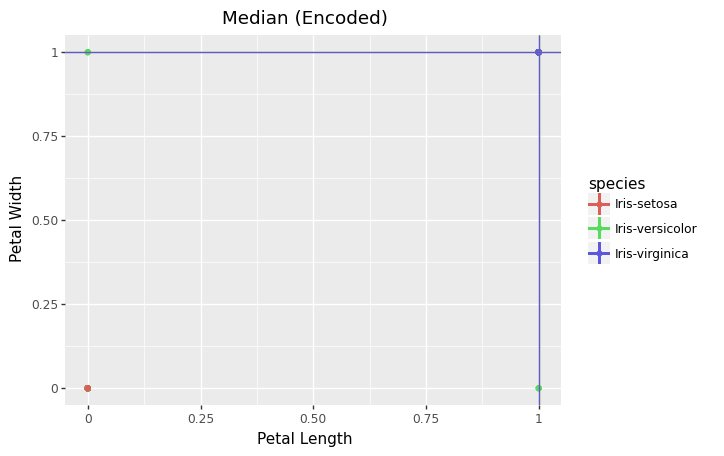

<ggplot: (8740560449001)>

In [35]:
## this type of plot will show the distribution on a chart
from plotnine import *

def show_distribution_plot(df, indicator):
  selected_option, indicator_txt = selected_indicator
  if selected_option == 0:
    return ggplot(df, aes(x='petal-length', y='petal-width', color='species')) + labs(x='Petal Length', y='Petal Width', title=selected_indicator[1] + ' (Encoded)')\
    + geom_point() + geom_vline(df, aes(xintercept=df['petal-length'].mean(), \
    color='species')) + geom_hline(df, aes(yintercept=df['petal-width'].mean(),\
                                              color='species'))
  elif selected_option == 1:
    return ggplot(df, aes(x='petal-length', y='petal-width', color='species')) + labs(x='Petal Length', y='Petal Width', title=selected_indicator[1] + ' (Encoded)')\
    + geom_point() + geom_vline(df, aes(xintercept=df['petal-length'].median(), \
    color='species')) + geom_hline(df, aes(yintercept=df['petal-width'].median(),\
                                              color='species'))
  elif selected_option == 2:
    return ggplot(df, aes(x='petal-length', y='petal-width', color='species')) + labs(x='Petal Length', y='Petal Width', title=selected_indicator[1] + ' (Encoded)')\
    + geom_point() + geom_vline(df, aes(xintercept=df['petal-length'].quantile(0.75), \
    color='species')) + geom_hline(df, aes(yintercept=df['petal-width'].quantile(0.75),\
                                              color='species'))
  elif selected_option == 3:
    return ggplot(df, aes(x='petal-length', y='petal-width', color='species')) + labs(x='Petal Length', y='Petal Width', title=selected_indicator[1] + ' (Encoded)')\
    + geom_point() + geom_vline(df, aes(xintercept=df['petal-length'].quantile(0.25), \
    color='species')) + geom_hline(df, aes(yintercept=df['petal-width'].quantile(0.25),\
                                              color='species'))
  else:
    print(':-(')  

show_distribution_plot(train, selected_indicator)

##Conclusion:
As it is now evident from the test results that there exists a very strong correlation between the 'petal-length' and 'petal-width' for Iris-virginica and that the 'Iris-setosa' species differs from rest of the two Iris flower species on 'petal-width' and 'sepal-width' in paired variable comparisons. The decision tree model with a very high accuracy (at more than 85% with the specific indicator measures) of the esitmated predictions against the test dataset was achieved due to the above extensive analysis of the training dataset and by way of following the data analysis process guidelines outlined in the introduction section.

##Reflection
The project has been a very extensive, detailed and yet complex, and one of the most exciting projects of the whole course for me. I learnt a lot while working on this project, and the likes, while on this course considering I was only just a beginner with basic knowledge of the Python language with almost no experience back in December last year when I joined this course to now when I am comfortable and becoming ever more fluent in using Python language, Pandas, Numpy, matplotlib, scipy etc libraries. I have gained valueable experience using the language, tools, libraries interfacing with the Oracle / SQL databases, the Excel spreadsheets and CSV files for the data retrieval and equiped with ever more knowledge of the Applied Statistics, I feel more and more confident to take a Data Analytical role than I was ever before the course.